In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BTC-2017min.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525599 entries, 0 to 525598
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        525599 non-null  int64  
 1   date        525599 non-null  object 
 2   symbol      525599 non-null  object 
 3   open        525599 non-null  float64
 4   high        525599 non-null  float64
 5   low         525599 non-null  float64
 6   close       525599 non-null  float64
 7   Volume BTC  525599 non-null  float64
 8   Volume USD  525599 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.1+ MB
None


In [4]:
print(data.head())

         unix                 date   symbol      open      high       low  \
0  1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  13867.18   
1  1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83  13884.69   
2  1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26  13874.99   
3  1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69  13827.00   
4  1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05  13825.05   

      close  Volume BTC    Volume USD  
0  13880.00    0.591748   8213.456549  
1  13953.77    1.398784  19518.309658  
2  13913.26    0.775012  10782.944294  
3  13859.58    0.666459   9236.841134  
4  13825.05    0.065501    905.560130  


In [5]:
print(data.describe())

               unix           open           high            low  \
count  5.255990e+05  525599.000000  525599.000000  525599.000000   
mean   1.498997e+09    3948.408377    3952.208189    3943.751886   
std    9.103650e+06    3936.757966    3942.382649    3929.589942   
min    1.483229e+09     752.000000     752.810000     751.340000   
25%    1.491113e+09    1197.450000    1197.980000    1197.040000   
50%    1.498997e+09    2567.440000    2569.370000    2565.350000   
75%    1.506881e+09    4535.565000    4539.405000    4531.030000   
max    1.514765e+09   19665.760000   19666.000000   19649.960000   

               close     Volume BTC    Volume USD  
count  525599.000000  525599.000000  5.255990e+05  
mean     3948.339307       8.939796  4.143441e+04  
std      3936.695963      20.779163  1.173633e+05  
min       752.040000       0.000000  0.000000e+00  
25%      1197.460000       0.348564  7.167660e+02  
50%      2567.170000       2.575998  7.249086e+03  
75%      4535.000000   

In [6]:
print(data.isnull().sum())

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


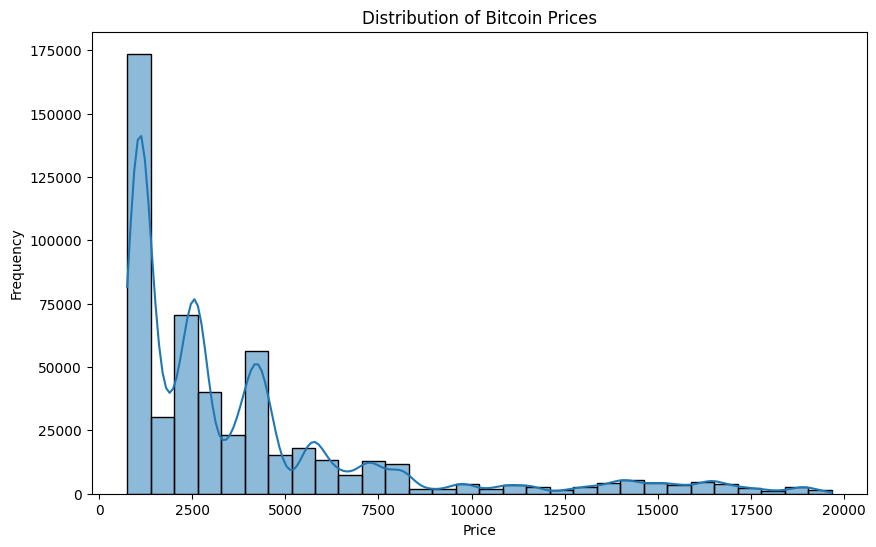

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

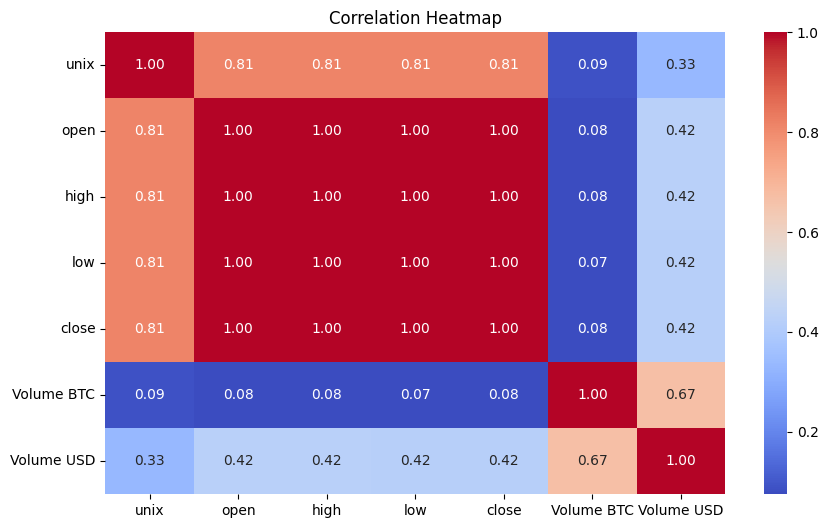

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

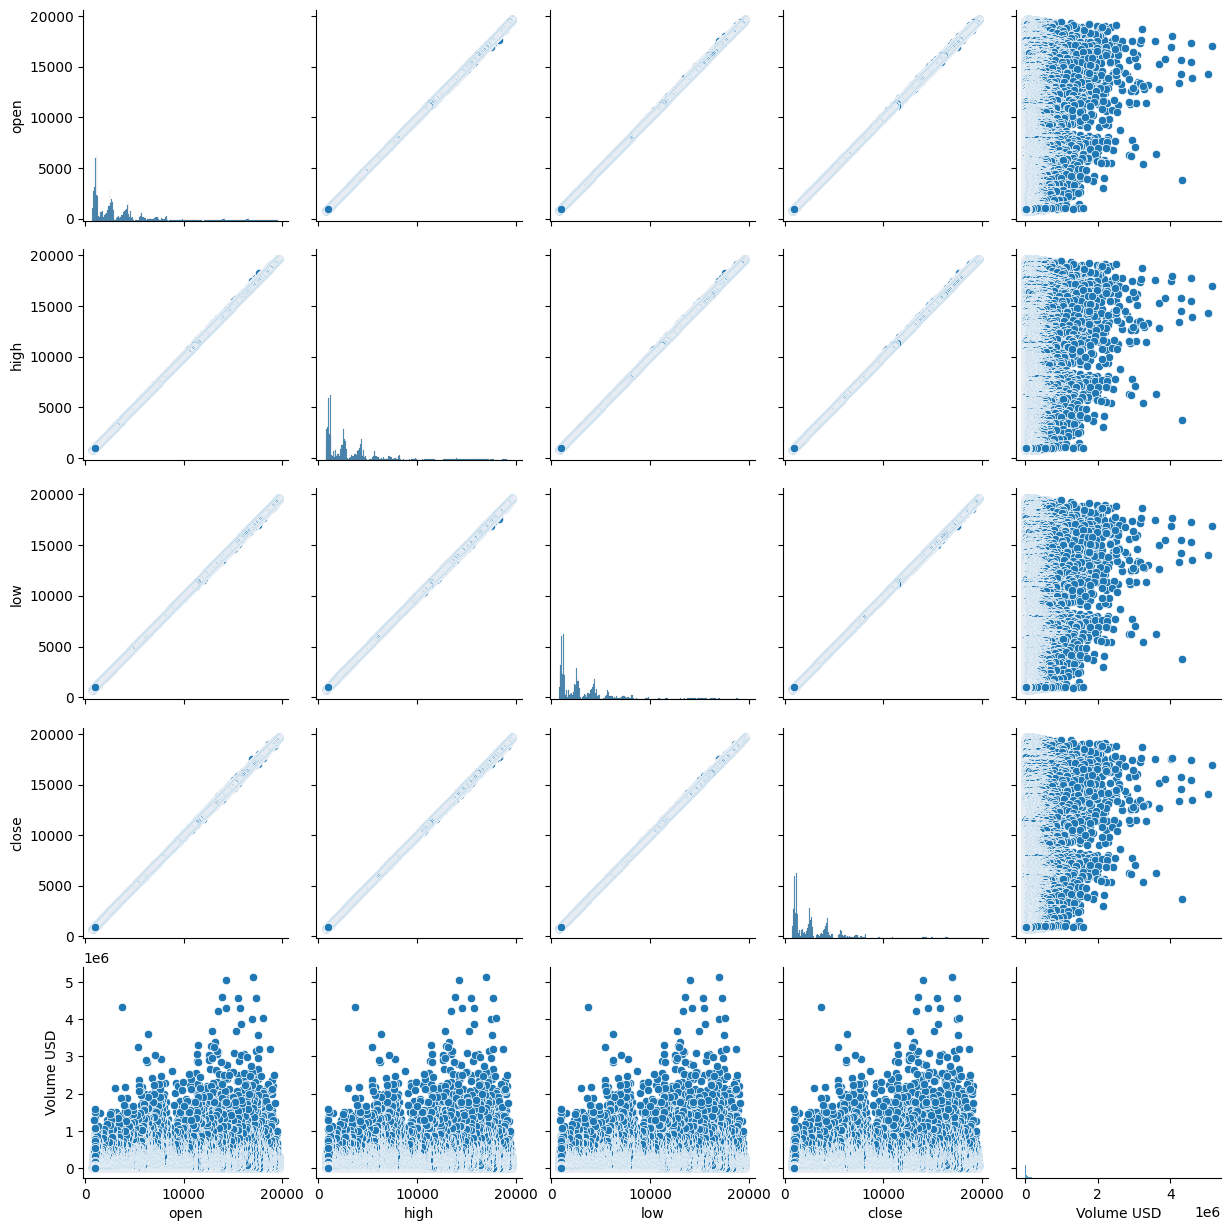

In [9]:
sns.pairplot(data[['open', 'high', 'low', 'close', 'Volume USD']])
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
data["date"]=pd.to_datetime(data["date"])
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["time"] = data["date"].dt.time
del data["date"]

In [13]:
data['time'] = data['time'].astype(str)
data['time'] = data['time'].str.split(':').str[0]
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)
data['time'] = data['time'].astype(int)

In [14]:
data.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,day,month,year,time
0,1514764740,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,31,12,2017,23
1,1514764680,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,31,12,2017,23
2,1514764620,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,31,12,2017,23
3,1514764560,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,31,12,2017,23
4,1514764500,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,31,12,2017,23


In [16]:
x,y=data.drop(["low","close","open","high","symbol"],axis=1),data[["high"]]
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x.shape

(525599, 7)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
model=Sequential()
model.add(Dense(84,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [20]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=25)

Epoch 1/50
3285/3285 [==============================] - 6s 2ms/step - loss: 5464608.8558 - val_loss: 265188.1250
Epoch 2/50
3285/3285 [==============================] - 6s 2ms/step - loss: 158866.5865 - val_loss: 71114.2031
Epoch 3/50
3285/3285 [==============================] - 5s 1ms/step - loss: 70014.4321 - val_loss: 54308.7148
Epoch 4/50
3285/3285 [==============================] - 8s 2ms/step - loss: 60352.6141 - val_loss: 50460.9609
Epoch 5/50
3285/3285 [==============================] - 19s 6ms/step - loss: 55572.4192 - val_loss: 56023.5938
Epoch 6/50
3285/3285 [==============================] - 12s 4ms/step - loss: 49601.8719 - val_loss: 50942.9336
Epoch 7/50
3285/3285 [==============================] - 13s 4ms/step - loss: 45310.0594 - val_loss: 125067.2969
Epoch 8/50
3285/3285 [==============================] - 11s 3ms/step - loss: 45804.0431 - val_loss: 34760.1523
Epoch 9/50
3285/3285 [==============================] - 13s 4ms/step - loss: 40841.7209 - val_loss: 39310.9570


In [56]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 84)                672       
_________________________________________________________________
dense_13 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_14 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_15 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_16 (Dense)             (None, 84)                7140      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 85        
Total params: 29,317
Trainable params: 29,317
Non-trainable params: 0
_________________________________________________

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
tmin=model.predict(x_test)

NameError: name 'x_test' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
r2_score(tmin,y_test)

0.9990815647314405

In [ ]:
(mean_squared_error(tmin,y_test))**0.5

117.95320847255448

In [ ]:
model.save('lstm_model.h5')